In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import cv2
import random
import pickle
import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import optimizers
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix
from scikeras.wrappers import KerasClassifier

# %matplotlib inline

In [8]:
path = "C:\\Users\\tprak_o7ept1f\\OneDrive\\Desktop\\Face_Shape_Classification\\"

X_train = np.asarray(pickle.load(open(path + "dataX_train_rgb.pickle","rb")))
y_train = np.asarray(pickle.load(open(path + "datay_train_rgb.pickle","rb")))
X_test = np.asarray(pickle.load(open(path + "dataX_test_rgb.pickle","rb")))
y_test = np.asarray(pickle.load(open(path + "datay_test_rgb.pickle","rb")))

In [9]:
print("Data Summary")
print("--------------------")
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print("--------------------")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

Data Summary
--------------------
X_train shape (4000, 224, 224, 3)
y_train shape (4000, 5)
--------------------
X_test shape (1000, 224, 224, 3)
y_test shape (1000, 5)


In [11]:
# Path for VGGFace weights

path_vggface = r"C:\Users\tprak_o7ept1f\OneDrive\Desktop\rcmalli_vggface_tf_notop_vgg16.h5"

In [12]:
# Loading VGG16 as base model

base_model = VGG16(input_shape=(224, 224, 3),  # same as our input
                   include_top=False,  # exclude the last layer
                   weights=path_vggface)  # use VGGFace Weights

In [13]:
for layer in base_model.layers:
  layer.trainable = False

In [14]:
# Compile and Fit the model

x = layers.Flatten()(base_model.output)

x = layers.Dense(64, activation='relu')(x)  # add 1 fully connected layer, try with 512 first 
x = layers.Dropout(0.5)(x)
x = layers.Dense(5, activation='softmax')(x)  # add final layer

model_t1 = tf.keras.models.Model(base_model.input, x)


8
model_t1.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

model_t1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,320,709 (62.26 MB)

 Trainable params: 1,606,021 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True)

In [16]:
datagen.fit(X_train)

In [17]:
history_t1 = model_t1.fit(datagen.flow(X_train, y_train, batch_size=32), 
                           steps_per_epoch=int(len(X_train) / 32), epochs=50, 
                          validation_data=(X_test, y_test))

d:\Major Project\mediapipe\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - accuracy: 0.4467 - loss: 1.3237 - val_accuracy: 0.7920 - val_loss: 0.6710
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 469s 4s/step - accuracy: 0.7279 - loss: 0.7508 - val_accuracy: 0.8320 - val_loss: 0.4993
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 459s 4s/step - accuracy: 0.7794 - loss: 0.6244 - val_accuracy: 0.8600 - val_loss: 0.4210
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy: 0.8275 - loss: 0.4969 - val_accuracy: 0.8770 - val_loss: 0.3748
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 458s 4s/step - accuracy: 0.8471 - loss: 0.4480 - val_accuracy: 0.8720 - val_loss: 0.3618
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 423s 3s/step - accuracy: 0.8501 - loss: 0.4208 - val_accuracy: 0.8800 - val_loss: 0.3459
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.8644 - loss: 0.3708 - val_accuracy: 0.8890 - val_loss: 0.3307
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.8732 - loss: 0.3539 - val_accu

In [19]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: D:\Major Project\mediapipe\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [29]:
model_path = 'C:\\Users\\tprak_o7ept1f\\OneDrive\\Desktop\\Face_Shape_Classification\\saved_models\\'

tf.keras.models.save_model (
    model_t1, filepath=model_path, overwrite=True, include_optimizer=True,  
    signatures=None, options=None, save_format='tf')

ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [21]:
model_path = 'C:\\Users\\tprak_o7ept1f\\OneDrive\\Desktop\\Face_Shape_Classification\\saved_models\\model_t1_lite.h5'

tf.keras.models.save_model(
    model_t1, 
    filepath=model_path, 
    overwrite=True, 
    include_optimizer=True
)

In [31]:
filename = model_path + 'vgg16-face-1.h5'   # change the filename for new iterations
model_t1.save(filename)

In [32]:
loaded_model = tf.keras.models.load_model(filename)
mod_t1_predict = np.argmax(model_t1.predict(X_test), axis=1) 
loaded_t1_predict = np.argmax(loaded_model.predict(X_test), axis=1)

# Check the difference

print(f'Difference in predictions: Saved model vs. original model is {np.sum(loaded_t1_predict - mod_t1_predict)}\nModel was correctly saved.')

32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step
Difference in predictions: Saved model vs. original model is 0
Model was correctly saved.


In [33]:
def plot_results(mod_history, metric, epochs):
      
      # Check out our train loss and test loss over epochs.
      train_metric = mod_history.history[metric]
      val = 'val_' + metric
      test_metric = mod_history.history[val]

      # Set figure size.
      plt.figure(figsize=(12, 8))

      # Generate line plot of training, testing loss over epochs.
      plt.plot(train_metric, label=f'Training {metric}', color='#185fad')
      plt.plot(test_metric, label=f'Testing {metric}', color='orange')

      # Set title
      plt.title(f'Training and Testing {metric} by Epoch', fontsize = 25)
      plt.xlabel('Epoch', fontsize = 18)
      plt.ylabel('Categorical Crossentropy', fontsize = 18)
      plt.xticks(range(0,epochs,5), range(0,epochs,5))
      plt.legend(fontsize = 18)

In [34]:
def make_predictions(mod_name, steps=20):
    preds = mod_name.predict(X_test,steps=steps)
    preds = preds.argmax(axis=-1)

    y_test_labels = np.argmax(y_test, axis=-1)

    cm = confusion_matrix(y_test_labels,preds)

    plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                          title='Face Shape Normalized')

    plt.show()

In [35]:
cm_plot_labels = ['Heart','Oblong','Oval','Round', 'Square']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
def plot_summary_results(mod_name, mod_history, epochs):
    plot_results(mod_history, 'loss',epochs)
    plot_results(mod_history, 'accuracy', epochs)
    make_predictions(mod_name)

20/20 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step
Normalized confusion matrix
[[0.925 0.015 0.025 0.015 0.02 ]
 [0.    0.935 0.04  0.01  0.015]
 [0.04  0.015 0.875 0.05  0.02 ]
 [0.01  0.005 0.07  0.905 0.01 ]
 [0.01  0.01  0.    0.06  0.92 ]]


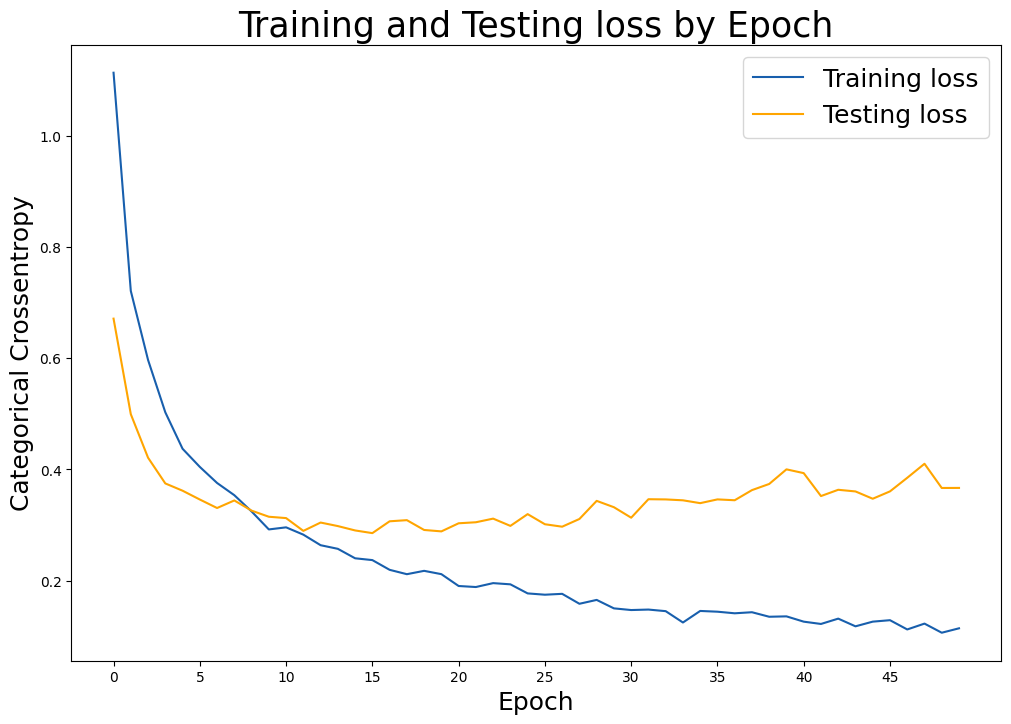

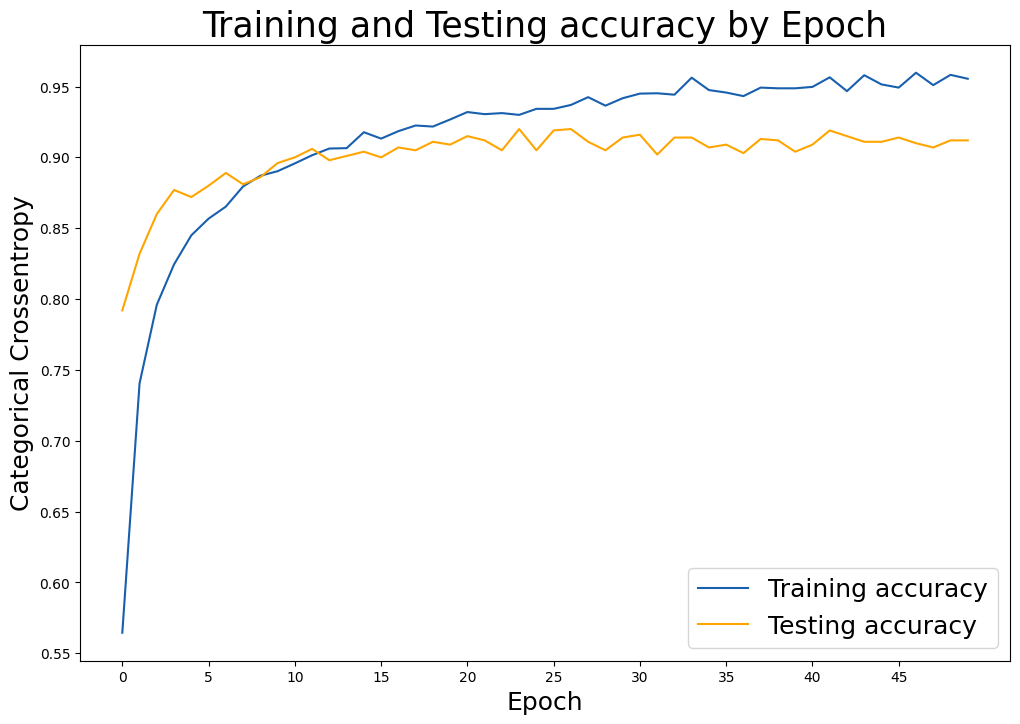

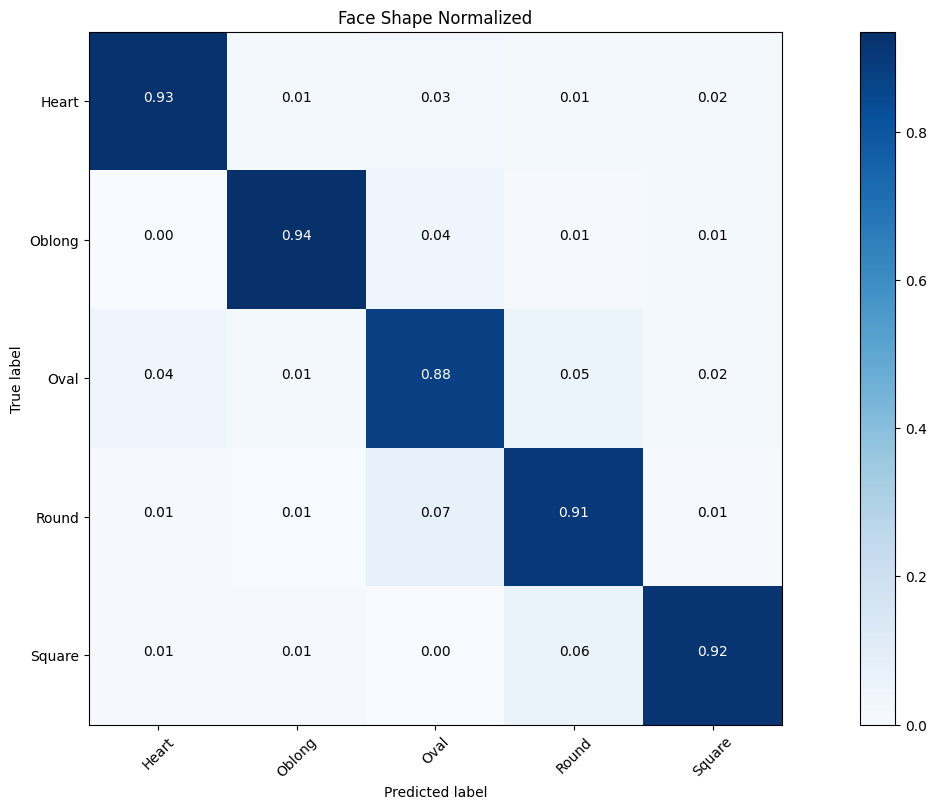

In [37]:
plot_summary_results(model_t1, history_t1, 50)

In [39]:
history_t2 = model_t1.fit(datagen.flow(X_train, y_train, batch_size=32), 
                          steps_per_epoch=int(len(X_train)/32), epochs=20, 
                          validation_data=(X_test, y_test))

d:\Major Project\mediapipe\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 487s 4s/step - accuracy: 0.9552 - loss: 0.1096 - val_accuracy: 0.9190 - val_loss: 0.4002
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 453s 4s/step - accuracy: 0.9532 - loss: 0.1129 - val_accuracy: 0.9090 - val_loss: 0.4034
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 455s 4s/step - accuracy: 0.9635 - loss: 0.0896 - val_accuracy: 0.9120 - val_loss: 0.4065
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 450s 4s/step - accuracy: 0.9633 - loss: 0.0992 - val_accuracy: 0.9120 - val_loss: 0.3915
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 445s 4s/step - accuracy: 0.9585 - loss: 0.1087 - val_accuracy: 0.9110 - val_loss: 0.3929
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 448s 4s/step - accuracy: 0.9530 - loss: 0.1170 - val_accuracy: 0.9140 - val_loss: 0.4087
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 447s 4s/step - accuracy: 0.9641 - loss: 0.0944 - val_accuracy: 0.9080 - val_loss: 0.4357
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.9634 - loss: 0.1088 - val_accu

In [40]:
filename = model_path + 'vgg16-face-2.h5'   # change the filename for new iterations
model_t1.save(filename)

In [41]:
loaded_model = tf.keras.models.load_model(filename)
mod_t1_predict = np.argmax(model_t1.predict(X_test), axis=1) 
loaded_t1_predict = np.argmax(loaded_model.predict(X_test), axis=1)

# Check the difference

print(f'Difference in predictions: Saved model vs. original model is {np.sum(loaded_t1_predict - mod_t1_predict)}\nModel was correctly saved.')

32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step
Difference in predictions: Saved model vs. original model is 0
Model was correctly saved.


20/20 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step
Normalized confusion matrix
[[0.935 0.02  0.02  0.01  0.015]
 [0.    0.965 0.02  0.01  0.005]
 [0.065 0.015 0.815 0.075 0.03 ]
 [0.02  0.005 0.045 0.925 0.005]
 [0.01  0.015 0.    0.075 0.9  ]]


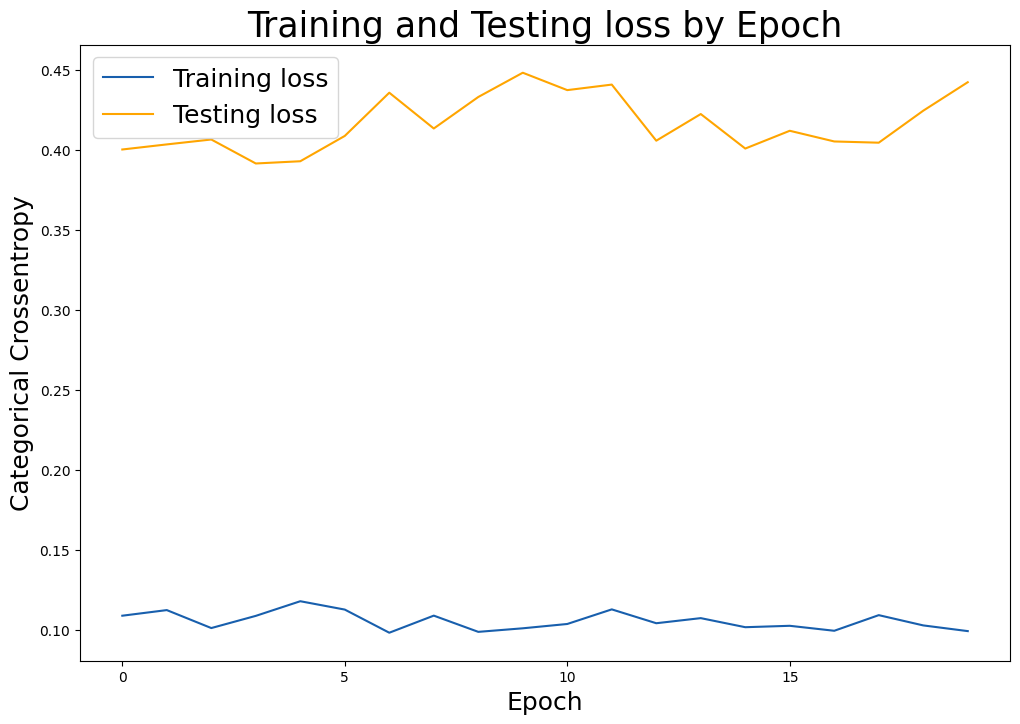

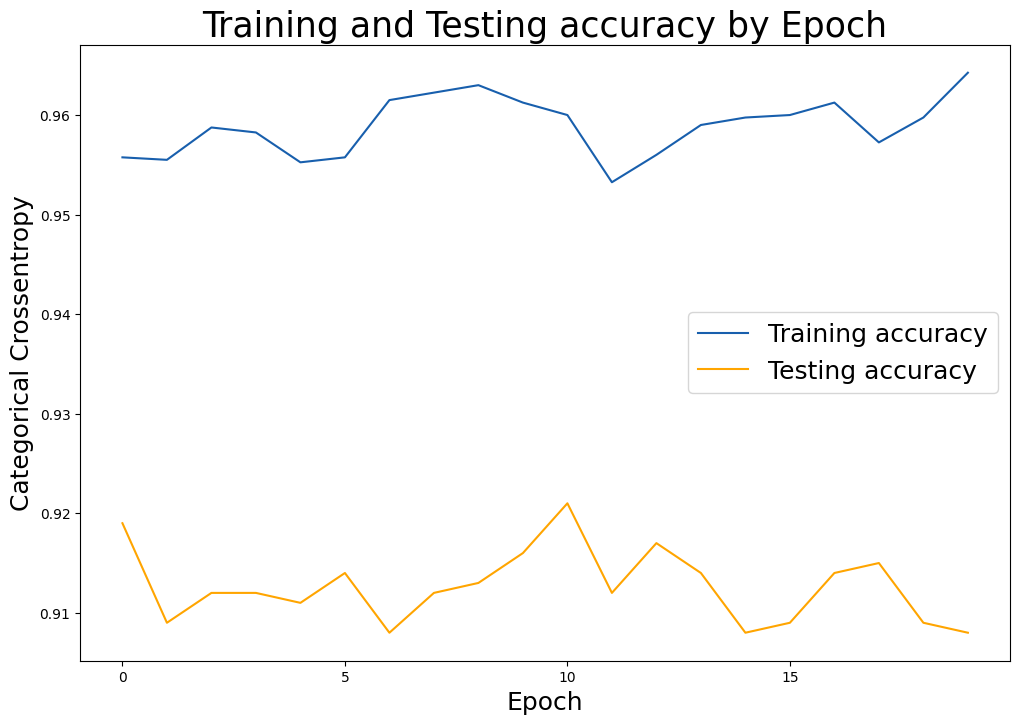

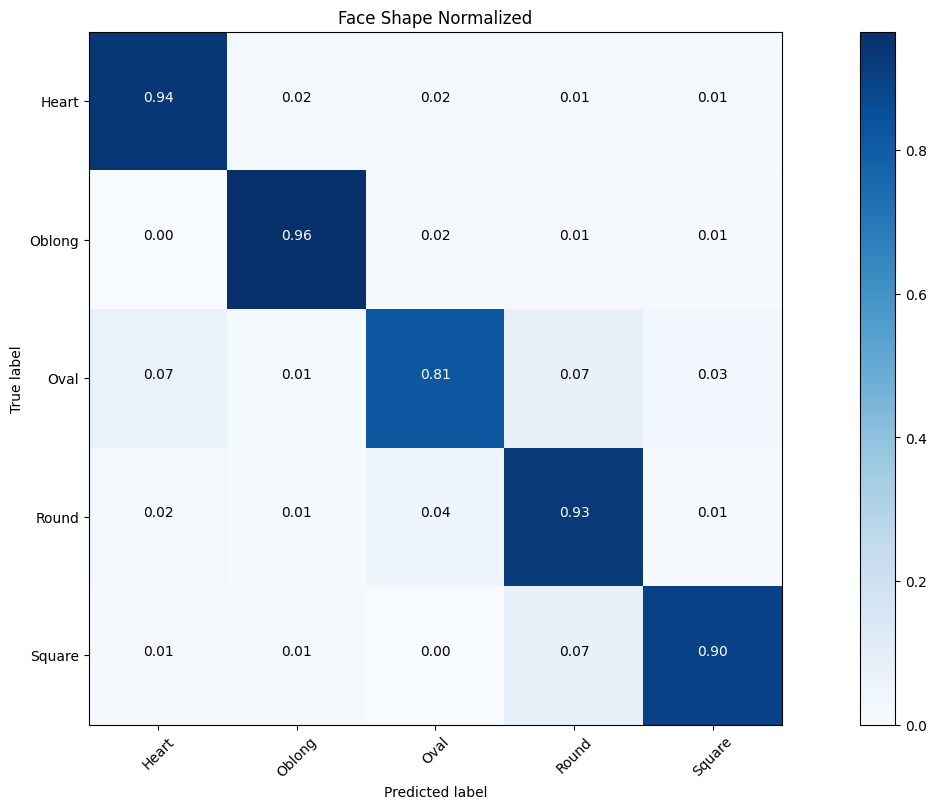

In [42]:
plot_summary_results(model_t1, history_t2, 20)